In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('spam.csv',encoding='latin-1')
data=data[['Label','SMS']]
data.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


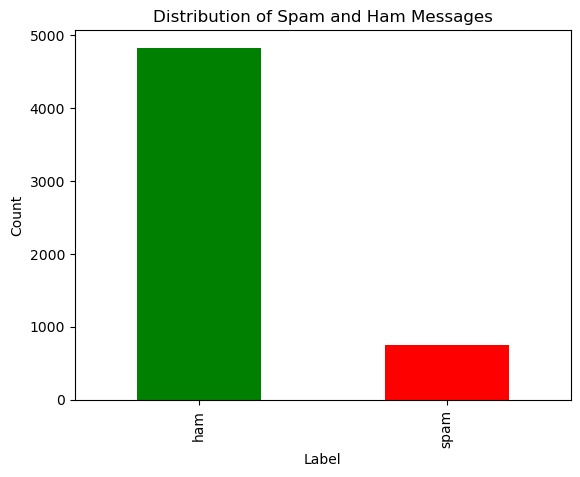

In [3]:
data['Label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [4]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    return ' '.join(word for word in text.split() if word not in stop_words)

data['Processed_SMS'] = data['SMS'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


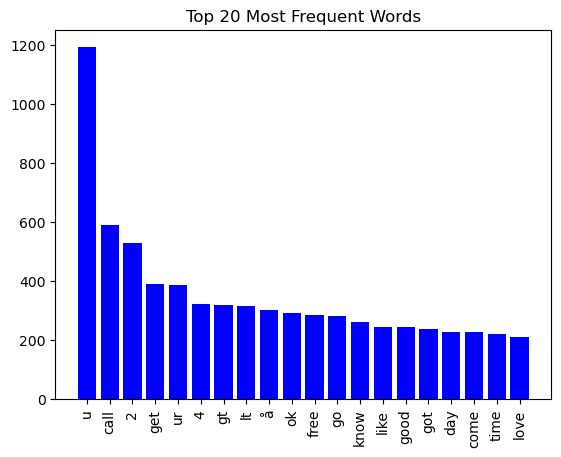

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

words, counts = zip(*Counter(' '.join(data['Processed_SMS']).split()).most_common(20))
plt.bar(words, counts, color='blue')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=90)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data['Processed_SMS'], data['Label'], test_size=0.2, random_state=42)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [8]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.91      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [9]:
def predict_spam(message):
    processed_message = preprocess_text(message)
    return model.predict([processed_message])[0]

print(predict_spam("Congratulations! You've won a free ticket!"))  # spam
print(predict_spam("Today is Monday"))  # ham


spam
ham
